2025-03-02 14:26:12.036729: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Explained variance: 0.96
Starting k-means clustering...
Fitting
Clustering completed
Cluster distribution: {0: 486, 1: 644, 2: 419, 3: 1202, 4: 790, 5: 615, 6: 466, 7: 741, 8: 223, 9: 1011, 10: 389, 11: 951, 12: 567, 13: 678, 14: 603, 15: 540, 16: 547, 17: 444, 18: 263, 19: 590, 20: 470, 21: 333, 22: 432, 23: 759, 24: 1452, 25: 756, 26: 607, 27: 491, 28: 684, 29: 734, 30: 606, 31: 431, 32: 525, 33: 371, 34: 612, 35: 320, 36: 335, 37: 1037, 38: 515, 39: 706, 40: 286, 41: 642, 42: 415, 43: 342, 44: 222, 45: 565, 46: 314, 47: 542, 48: 626, 49: 464, 50: 439, 51: 348, 52: 727, 53: 963, 54: 1155, 55: 547, 56: 390, 57: 584, 58: 670, 59: 812, 60: 598, 61: 520, 62: 658, 63: 562, 64: 557, 65: 554, 66: 793, 67: 483, 68: 698, 69: 446, 70: 564, 71: 846, 72: 546, 73: 1293, 74: 282, 75: 628, 76: 670, 77: 1303, 78: 650, 79: 340, 80: 593, 81: 807, 82: 264, 83: 606, 84: 248, 85: 646, 86: 572, 87: 622, 88: 347, 89: 744, 90: 568, 91: 777, 92: 499, 93: 779, 94: 669, 95: 473, 96: 380, 97: 1069, 98: 508, 99:

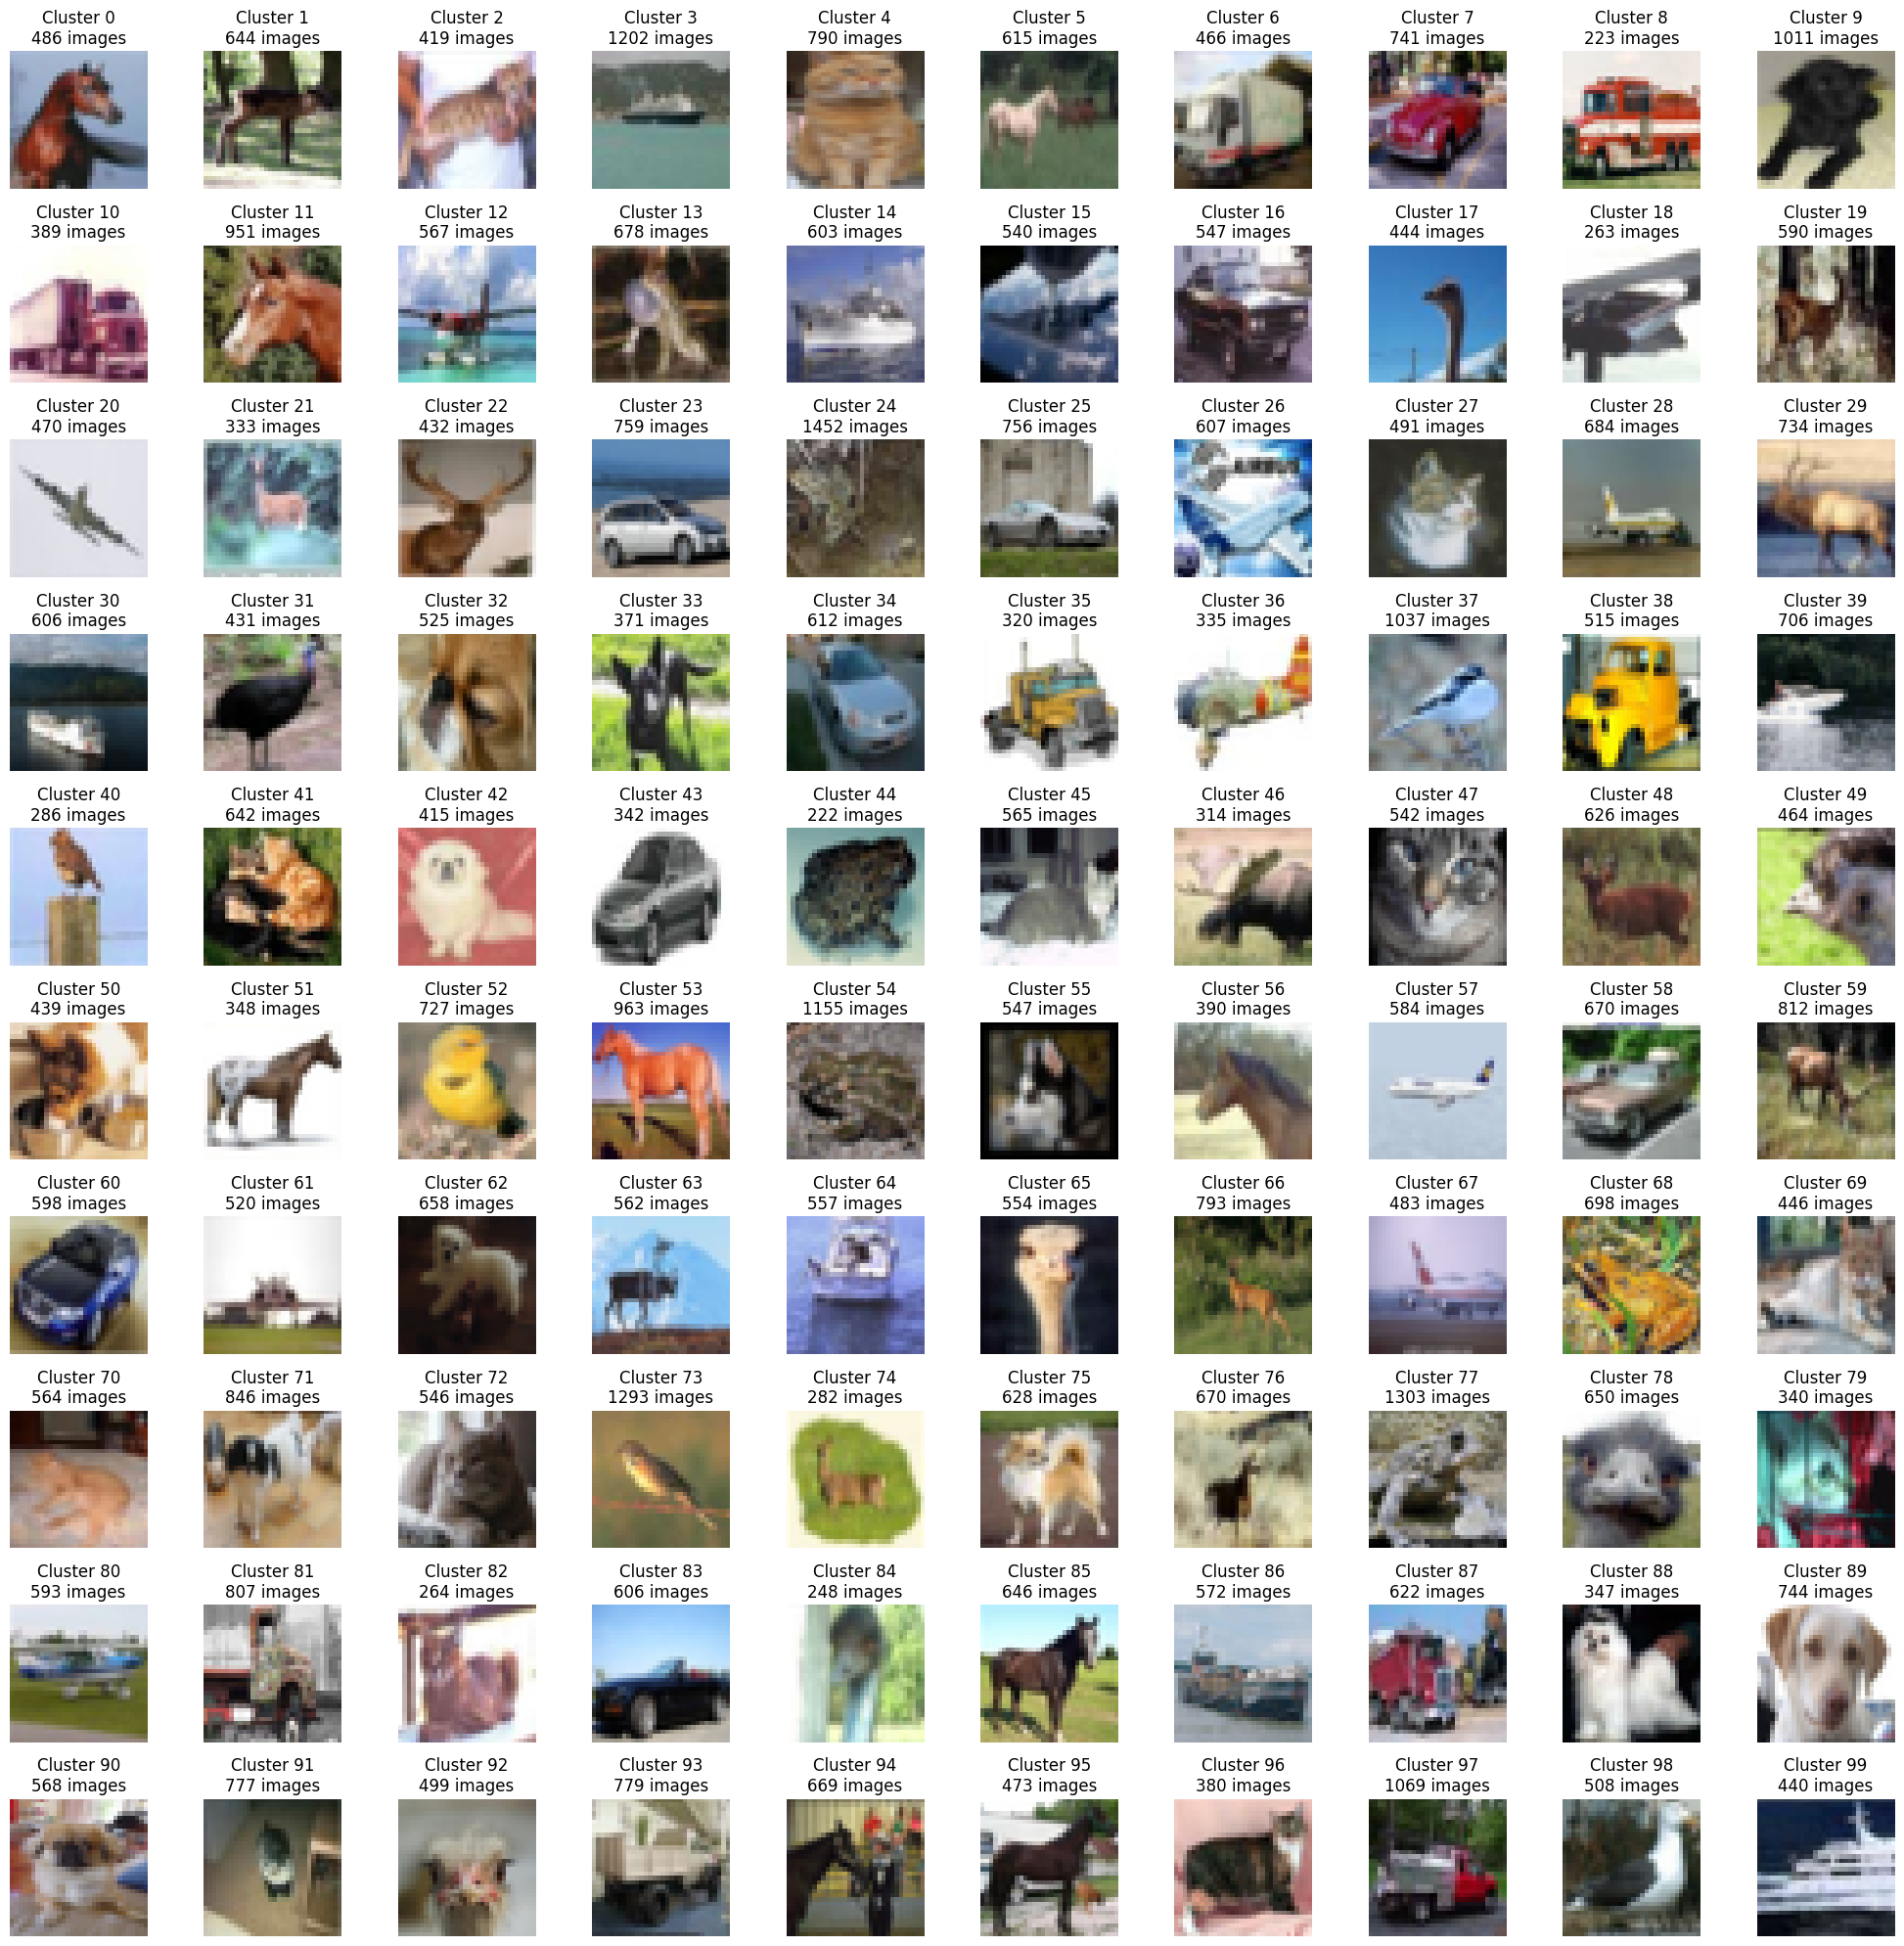

In [1]:
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import time

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Combine training and test data for clustering
X_combined = np.vstack([X_train, X_test])

# Flatten images (convert from 32x32x3 to 3072 vector)
X_flat = X_combined.reshape(X_combined.shape[0], -1)

# Normalize pixel values to [0,1]
X_flat = X_flat.astype('float32') / 255.0

# Optional: Apply PCA to reduce dimensions (e.g., to 256 components)
# Uncomment if needed for computational efficiency
pca = PCA(n_components=256)
X_reduced = pca.fit_transform(X_flat)
print(f"Explained variance: {sum(pca.explained_variance_ratio_):.2f}")

# Apply k-means clustering
print("Starting k-means clustering...")

# Option 1: Standard KMeans (may be slow)
kmeans = KMeans(n_clusters=100, random_state=42, n_init=10)

# Option 2: MiniBatchKMeans (faster)
# kmeans = MiniBatchKMeans(n_clusters=100, random_state=42, batch_size=1000, n_init=3)

print("Fitting")
# Fit the model - use X_reduced if you applied PCA, otherwise use X_flat
cluster_labels = kmeans.fit_predict(X_reduced)
print("Clustering completed")

# Examine the distribution of clusters
unique, counts = np.unique(cluster_labels, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))

# Visualize some examples from each cluster
#def visualize_cluster_examples(X, labels, n_clusters=100, samples_per_cluster=5):
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
axes = axes.flatten()

for i in range(100):
    cluster_samples = X_combined[cluster_labels == i]
    
    if len(cluster_samples) > 0:
        idx = np.random.choice(len(cluster_samples), 
                                min(5, len(cluster_samples)), 
                                replace=False)
        
        if len(idx) > 0:
            # Display first sample from each cluster
            sample = cluster_samples[idx[0]].reshape(32, 32, 3)
            axes[i].imshow(sample)
            axes[i].set_title(f'Cluster {i}\n{len(cluster_samples)} images')
            axes[i].axis('off')

plt.tight_layout()
#plt.savefig('cifar10_clusters.png')
plt.show()

# Reshape X_combined for visualization
#visualize_cluster_examples(X_combined, cluster_labels)